# 5. Example: Reading and Writing Data in netCDF format
 
Since you may want to download or generate data from another source, DataAssimBench offers the functionality to import data from netCDF.

### Part I: Download data

First, let's download some example data from: https://www.unidata.ucar.edu/software/netcdf/examples/files.html

In [1]:
import urllib

In [2]:
urllib.request.urlretrieve("https://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc", "./tos_01_2001-2002.nc")

('./tos_01_2001-2002.nc', <http.client.HTTPMessage at 0x7f7af477b970>)

### Part II: Load data

When loading data from a netCDF, we use the dabench.data.Data class.

Once we define our data object, it's as easy as using the .load_netcdf() method with a specific path.

NOTE: This is a work in progress. Depending on the format of the NetCDF, loading may not work. If you run into issues, open a github issue and we can update the code so that the method loads your NetCDF: https://github.com/StevePny/DataAssimBench/issues

In [3]:
import matplotlib.pyplot as plt
from dabench import data

In [4]:
data_obj = data.Data()

In [5]:
data_obj.load_netcdf('./tos_01_2001-2002.nc')

In [6]:
# In this case, we have 24 months of global sea surface temperature data
# Each cell is 1 x 1 degree lat/lon
print(data_obj.values.shape)
print(data_obj.time_dim)
print(data_obj.original_dim)

(24, 30600)
24
(170, 180)


In [7]:
print(data_obj.values_gridded.shape)

(24, 170, 180)


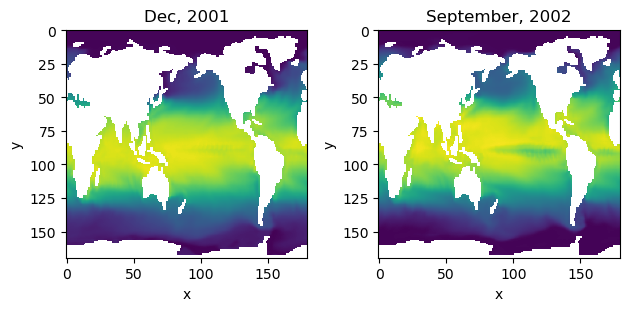

In [8]:
# Plot December 2001 vs September 2002
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data_obj.values_gridded[11],  vmin=271, vmax=305)
ax[0].set_title('Dec, 2001')
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(data_obj.values_gridded[20],  vmin=271, vmax=305)
ax[1].set_title('September, 2002')
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

### Part III: Write Data

We can also write data to netCDF. 

Let's generate some data using Lorenz63 and save to netCDF. See the first example notebook, 1-basics-lorenz63.ipynb, for more detailed discussion of how this data is being generated

In [9]:
l63_model = data.Lorenz63()
l63_model.generate(n_steps=1000)
print(l63_model.values)

[[-10.       -15.        21.3     ]
 [-10.499835 -15.48437   22.282291]
 [-10.994274 -15.884403  23.360668]
 ...
 [ 14.970768  18.057531  32.537518]
 [ 15.218436  17.060793  34.3015  ]
 [ 15.335094  15.809253  35.88078 ]]


In [10]:
l63_model.save_netcdf('./l63_data.nc')

In [11]:
# Now let's reload that data we just wrote to file
reload_l63 = data.Data()
reload_l63.load_netcdf('./l63_data.nc')
# And check to make sure that it's the same as the data we generated
print(reload_l63.values)

[[-10.       -15.        21.3     ]
 [-10.499835 -15.48437   22.282291]
 [-10.994274 -15.884403  23.360668]
 ...
 [ 14.970768  18.057531  32.537518]
 [ 15.218436  17.060793  34.3015  ]
 [ 15.335094  15.809253  35.88078 ]]


Looks good!